<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



# **Introducción**



El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas que abordaremos en el presente notebook:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento: Método GroupBy()</li>  
  <li> Correlación de Pearson</li>
  <li> Mapas de correlación</li>
  <li> Análisis de variaciones: Anova</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns

In [2]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [3]:
#Apariencia de la tabla de datos
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.to_csv("auto.csv")

In [5]:
df.isna().sum() #No necesariamente cero

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df.shape #Muestras x caracteristicas

(201, 29)

In [7]:
df.dtypes #Tipos de datos

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

# **Estadística descriptiva**



Antes de ponernos en la tarea de construir un modelo que pretenda predecir alguna característica del conjunto de datos, es importante realizar una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cual permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

## Metodos .describe() y .value_counts()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [9]:
# Para dar una descripción estadística de variables numéricas:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


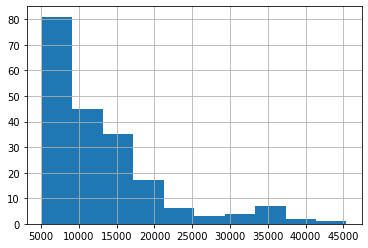

In [10]:
df.price.hist()

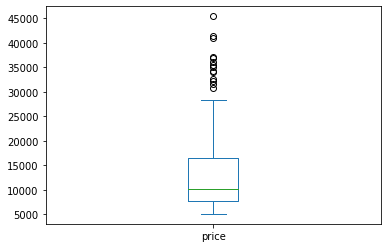

In [11]:
df.price.plot(kind='box')

Por ejemplo, la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [12]:
# Para contabilizar variables categóricas:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

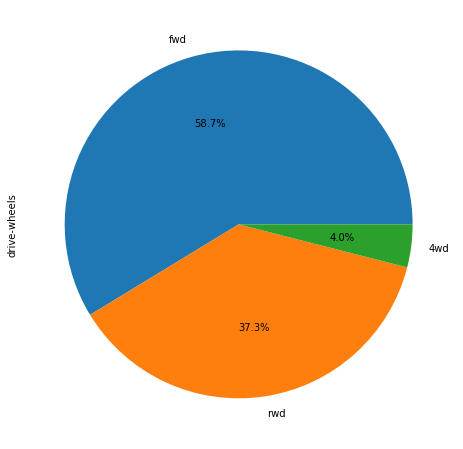

In [13]:
df["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.1f%%', figsize=(8,8))

No obstante, esta función también permite contabilizar las variables numéricas. Por ejemplo, "width" representa el ancho de los carros:

In [14]:
df["width"].value_counts()

0.886111    24
0.923611    23
0.908333    15
0.950000    10
0.894444    10
0.883333     9
0.888889     9
0.909722     8
0.905556     7
0.911111     6
0.933333     6
0.920833     6
0.891667     6
0.929167     5
0.956944     4
0.900000     4
0.912500     4
0.943056     4
0.995833     3
0.976389     3
0.902778     3
0.887500     3
0.991667     3
0.966667     2
0.918056     2
0.897222     2
0.948611     2
0.940278     2
0.890278     2
0.925000     1
0.880556     1
0.980556     1
0.944444     1
1.000000     1
0.979167     1
0.858333     1
0.916667     1
0.868056     1
0.837500     1
0.984722     1
0.922222     1
0.919444     1
0.955556     1
Name: width, dtype: int64

## Box Plots

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0">

En esta gráfica, podemos identificar las siguiente cantidades:

<ol>
    <li> Mediana.</li><br>
    <li> Cuartil superior $P_{75}.$</li><br>
    <li> Cuartil inferior $P_{25}$</li><br>
    <li>Rango intercuartil $IQR=P_{75}-P_{25}$</li><br>
    <li>Extremo superior UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}<br> </li><br>
    <li>Extremo inferior LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}<br></li>
</ol>

In [15]:
import seaborn as sns

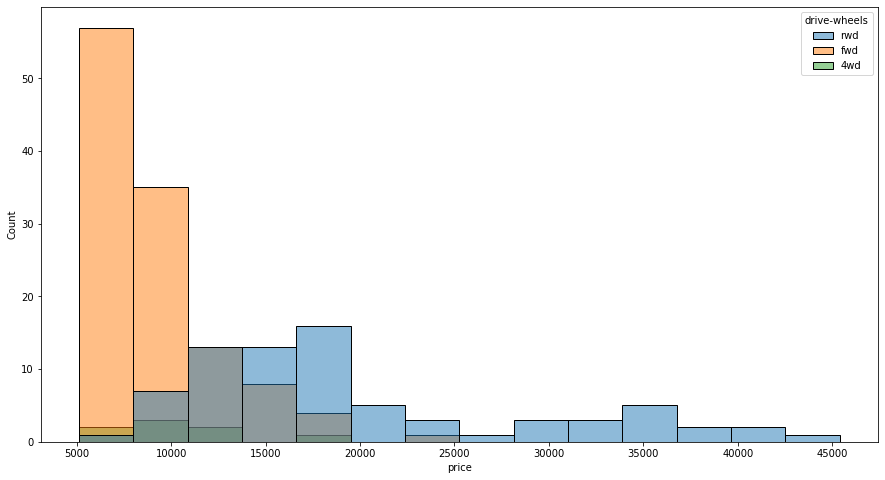

In [16]:
fig,ax = plt.subplots(figsize=(15,8)) 
sns.histplot(data=df,x='price',hue='drive-wheels',ax=ax)

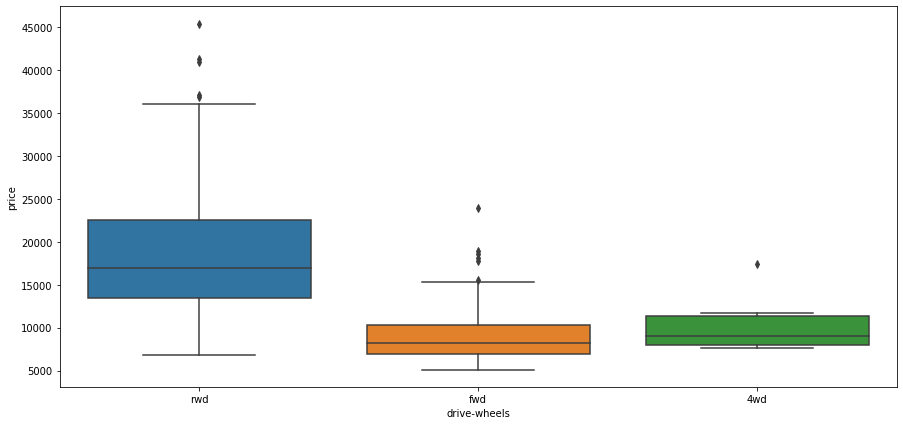

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(x="drive-wheels",y="price", data=df)

En este caso se tiene que:

1 Mediana: rwd $\rightarrow$ 16900, fwd $\rightarrow$ 8192 y 4wd$\rightarrow$9005.5


In [18]:
df.groupby('drive-wheels').median()["price"]

drive-wheels
4wd     9005.5
fwd     8192.0
rwd    16900.0
Name: price, dtype: float64

2. Cuartil superior: $P_{75\text{-rwd}}\approx 22547.50$, $P_{75\text{-fwd}}\approx 10333$ y $P_{75\text{-4wd}}\approx 11368$

In [19]:
q3 = df.groupby('drive-wheels').quantile(q=0.75)["price"]
q3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


drive-wheels
4wd    11367.75
fwd    10332.50
rwd    22547.50
Name: price, dtype: float64

3. Cuartil inferior: $P_{25\text{-rwd}}= 13455$, $P_{25\text{-fwd}}\approx 6951$ y $P_{25\text{-4wd}}\approx 7984$

In [20]:
q1 = df.groupby('drive-wheels').quantile(q=0.25)["price"]
q1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


drive-wheels
4wd     7984.25
fwd     6950.75
rwd    13455.00
Name: price, dtype: float64

4. Rango intercuartil: $IQR_{\text{rwd}}\approx 9093$, $IQR_{\text{fwd}}\approx 3381$ y $IQR_{\text{4wd}}\approx 3384$

In [21]:
iqr = q3 - q1
iqr

drive-wheels
4wd    3383.50
fwd    3381.75
rwd    9092.50
Name: price, dtype: float64

<hr size=15 noshade color="#F19CBB">

**EJERCICIO 1**


5. Extremo superior \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}


6. Extremo inferior \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}

<hr size=15 noshade color="#F19CBB">

In [22]:
UP1 = q3 + 1.5*iqr
UP2 = df.groupby('drive-wheels').agg({'price':'max'})['price']
UP1 < UP2

drive-wheels
4wd    True
fwd    True
rwd    True
Name: price, dtype: bool

In [23]:
df.groupby('drive-wheels')['price'].max()

drive-wheels
4wd    17450.0
fwd    23875.0
rwd    45400.0
Name: price, dtype: float64

Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. Usemos el diagrama de cajas para determinar si la variable "body-style" y "engine-location", la cual determina el tipo de carro, es un buen predictor del precio. 



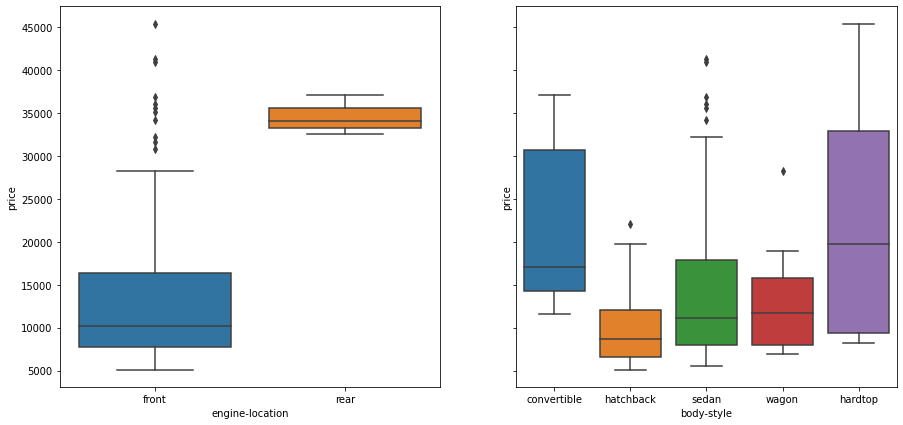

In [24]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,7))

sns.boxplot(x="engine-location",y="price", data=df, ax=ax[0])
sns.boxplot(x="body-style", y="price", data=df, ax= ax[1])

* Figura 1: Puede observarse qu la distribución de los precios entre las subcategorias fron y rear son lo suficiente diferentes como para considerar la variable categórica "engine-location" como un predictor adecuado del precio.

* Figura 2: Se puede observar que el precio de los carros para los diferentes tipos de carros presenta una superposición significativa, de tal forma que la variable "body-style" no sería un predictor adecuado del precio




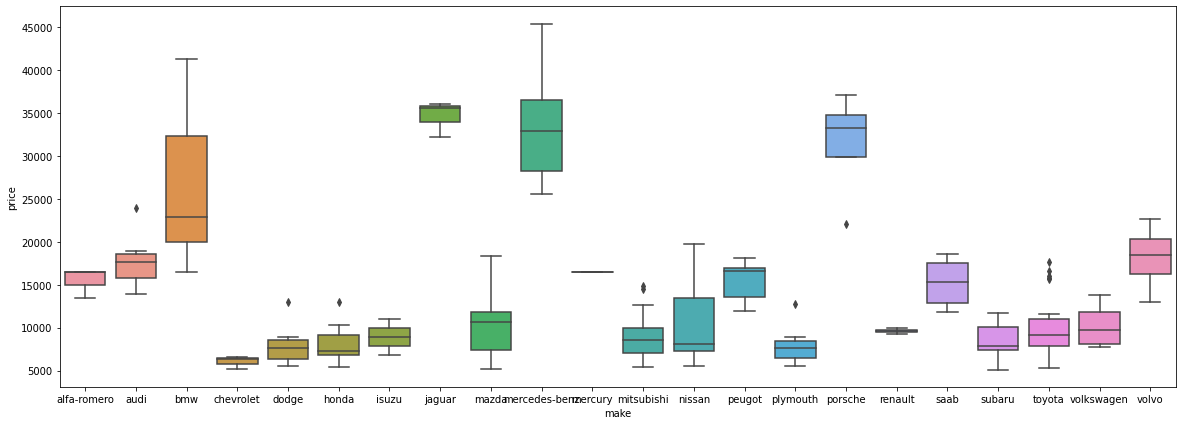

In [25]:
plt.figure(figsize=(20,7))
sns.boxplot(x="make", y="price", data=df)

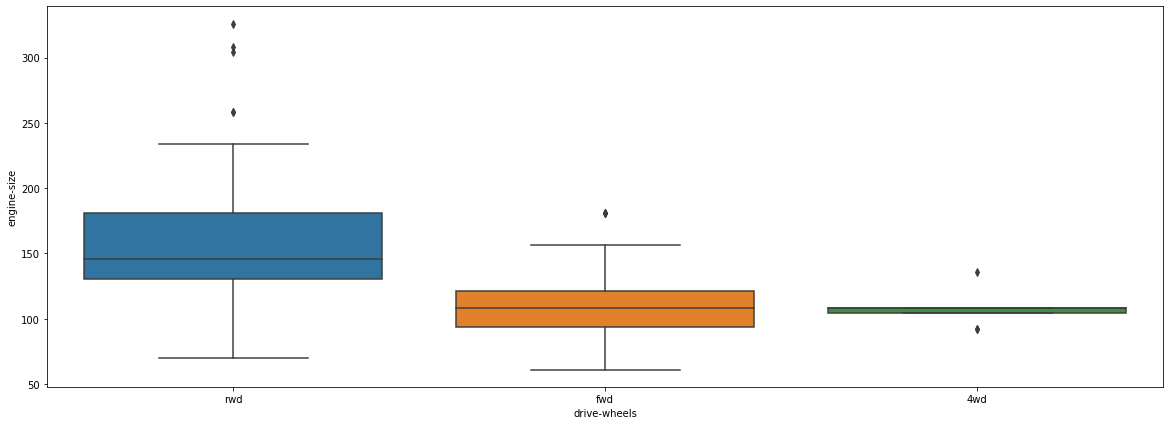

In [26]:
plt.figure(figsize=(20,7))
sns.boxplot(x="drive-wheels", y="engine-size", data=df)

## Scatter plots

Dentro de nuestros datos podemos tener en varias ocaciones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine-size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable diana o blanco: "price".</li>
    <li>Variable predictora: "engine-size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable diana.

Veamos ahora como se relacionan las variables "price" y "engine-size".

In [27]:
df.select_dtypes(exclude='object').columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

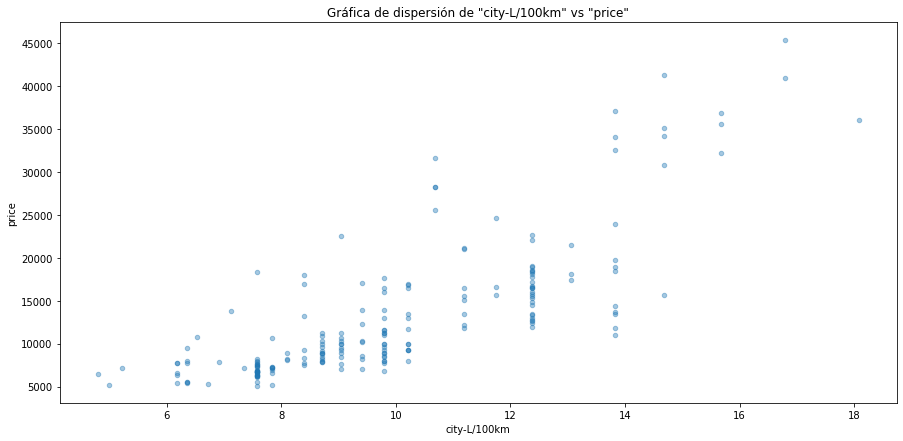

In [28]:
select_col = 'city-L/100km' 
df.plot(kind="scatter", y = "price", x = select_col, title = f"Gráfica de dispersión de \"{select_col}\" vs \"price\"", alpha = 0.4, figsize=(15,7))

<hr size=15 noshade color="#F19CBB">

**EJERCICIO 2**


Variar la variable predictora, por lo menos 3 opciones y compare.  

<hr size=15 noshade color="#F19CBB">

#**Groupby**



`Seaborn` es una libreria para hacer gráficos estadísticos en Python. Está construido sobre matplotlib y está estrechamente integrado con las estructuras de datos de pandas. Tiene incorporadas algunas [bases de datos](https://github.com/mwaskom/seaborn-data)

## Funciones Transform y Filter

El dataset Planets, disponible a través del paquete Seaborn, da información sobre planetas descubiertos alrededor de otras estrellas. Se puede descargar via Seaborn de la siguiente manera. 

In [29]:
import seaborn as sns
import numpy as np
import pandas as pd

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [30]:
###### --> Operaciones condicionadas
df_example = planets.copy()
df_example['newcol'] = 0
cond1 = (df_example['mass'] > 5) & (df_example['mass'] < 10)
index_cond1 = df_example[cond1].index
df_example.loc[index_cond1]
#df_example.loc[index_cond1,'newcol'] = df_example.loc[index_cond1,'distance']*df_example.loc[index_cond1,'mass']
#df_example

,method,number,orbital_period,mass,distance,year,newcol
0,Radial Velocity,1,269.30000,7.1000,77.40,2006,0
11,Radial Velocity,1,335.10000,9.8800,39.43,2009,0
27,Radial Velocity,1,952.70000,5.3000,97.18,2008,0
32,Eclipse Timing Variations,1,10220.00000,6.0500,NaN,2009,0
50,Radial Velocity,1,594.90000,7.6000,47.53,2006,0
51,Radial Velocity,1,428.50000,8.7800,38.52,2009,0
76,Radial Velocity,1,655.60000,5.1000,37.54,2008,0
199,Radial Velocity,2,6005.00000,5.3000,25.64,2012,0
203,Radial Velocity,1,533.00000,6.1000,7.01,2010,0
218,Radial Velocity,1,177.11000,7.6000,150.60,2011,0


Recordemos que Groupby nos ofrece las funciones `aggregate()` y `apply()`. 

`aggregate()` puede tomar una cadena, una función o una lista de estas, y calcular todos los agregados a la vez, mientras que `apply()` permite aplicar una función arbitraria a los resultados del agrupamiento

In [31]:
planets.shape

(1035, 6)

In [32]:
planets.groupby("method").count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [33]:
planets.groupby("method").distance.aggregate(["min", "max", "median"])
#planets.groupby("method").distance.apply(np.min)

,min,max,median
method,,,
Astrometry,14.98,20.77,17.875
Eclipse Timing Variations,130.72,500.00,315.360
Imaging,7.69,165.00,40.395
Microlensing,1760.00,7720.00,3840.000
Orbital Brightness Modulation,1180.00,1180.00,1180.000
Pulsar Timing,1200.00,1200.00,1200.000
Pulsation Timing Variations,NaN,NaN,NaN
Radial Velocity,1.35,354.00,40.445
Transit,38.00,8500.00,341.000


Si bien `aggregate()` debe devolver una versión reducida de los datos, `transform` puede devolver una versión transformada de los datos completos para que se recombinen. Para tal transformación, la salida tiene la misma forma que la entrada

In [34]:
#df2 = planets.groupby('method')[["distance"]].transform("median") .drop_duplicates()
df2 = planets.copy()
df2['ID'] = np.random.randint(0,100000,df2.shape[0]).astype('int').astype('str') 
df2=df2.set_index('ID')
df2_g = df2.groupby('method')[["distance", "orbital_period"]].transform("mean")
df2_g.columns = [c+'_prom' for c in df2_g.columns]
#df2.reset_index(drop=True)
pd.concat([df2[["distance", "orbital_period"]],df2_g],axis=1)

,distance,orbital_period,distance_prom,orbital_period_prom
ID,,,,
74401,77.40,269.300000,51.600208,823.354680
65420,56.95,874.774000,51.600208,823.354680
89454,19.84,763.000000,51.600208,823.354680
34754,110.62,326.030000,51.600208,823.354680
99568,119.47,516.220000,51.600208,823.354680
...,...,...,...,...
93446,172.00,3.941507,599.298080,21.102073
92682,148.00,2.615864,599.298080,21.102073
26254,174.00,3.191524,599.298080,21.102073


La operación `filter` permite eliminar datos en función de las propiedades del grupo. Note que esta rutina no filtra un marco de datos en su contenido. El filtro se aplica a las etiquetas del índice.

In [35]:
# agrupemos por método y filtremos los que operan a una distancia media mayor a 500

def filter_func(x):
  return x["distance"].mean() > 500 #

planets.groupby('method').filter(filter_func).method.value_counts()

Transit                          397
Microlensing                      23
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Name: method, dtype: int64

In [36]:
planets.groupby('method').mean().distance

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

Ejemplo: Muestre el número de planetas descubiertos por método de detección y por década

In [37]:
decade = 10 * (planets['year'] // 10)    # serie que contiene las decadas
decade = decade.astype(str) + 's'               
planets.groupby(['method', decade])['number'].sum()#.unstack().fillna(0)

method                         year 
Astrometry                     2010s      2
Eclipse Timing Variations      2000s      5
                               2010s     10
Imaging                        2000s     29
                               2010s     21
Microlensing                   2000s     12
                               2010s     15
Orbital Brightness Modulation  2010s      5
Pulsar Timing                  1990s      9
                               2000s      1
                               2010s      1
Pulsation Timing Variations    2000s      1
Radial Velocity                1980s      1
                               1990s     52
                               2000s    475
                               2010s    424
Transit                        2000s     64
                               2010s    712
Transit Timing Variations      2010s      9
Name: number, dtype: int64

In [38]:
planets.groupby(['method', 'year'])['number'].sum()

method                     year
Astrometry                 2010     1
                           2013     1
Eclipse Timing Variations  2008     4
                           2009     1
                           2010     4
                                   ..
Transit                    2014    93
Transit Timing Variations  2011     2
                           2012     2
                           2013     2
                           2014     3
Name: number, Length: 69, dtype: int64

In [39]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Especificando la clave para la división del DataFrame 

Los ejemplos presentados anteriormente expresan solo unas de las muchas opciones mediante las cuales se pueden definir los grupos. Veamos algunas otras opciones para la especificación de grupos

In [40]:
# la clave puede ser cualquier serie o lista con una longitud que coincida con la del DataFrame

rng = np.random.RandomState(0)        
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(1,7),'data2': rng.randint(0, 10, 6)}, 
                  columns = ['key', 'data1', 'data2']) 
print(df)

# agrupar las filas 0 y 2 con índice "a"; las 1 y 3 con índice 1 ; las 4 y 5 con índice 10 y obtener la media
L = ["a", 1, "a", 1, 10, 10]    
df.groupby(L).mean()

  key  data1  data2
0   A      1      5
1   B      2      0
2   C      3      3
3   A      4      3
4   B      5      7
5   C      6      9


,data1,data2
1,3.0,1.5
10,5.5,8.0
a,2.0,4.0


Otro método es el de proporcionar un diccionario que asigne los valores de los índices a las claves de grupo

In [41]:
# asignar la columna "key" como índice
df2 = df.set_index('key')   
print(df2) 

# mapear los índices
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'} 
print(df2.groupby(mapping).sum())

     data1  data2
key              
A        1      5
B        2      0
C        3      3
A        4      3
B        5      7
C        6      9
           data1  data2
key                    
consonant     16     19
vowel          5      8


Análogamente al mapeo, es posible pasar cualquier función de Python que ingrese el valor del índice y genere el grupo

In [42]:
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,2.5,4.0
b,3.5,3.5
c,4.5,6.0


cualquiera de las opciones anteriores se pueden combinar para agrupar con índice múltiple

In [43]:
mi = df2.groupby([str.lower, mapping]).mean()
mi

,,data1,data2
key,key,,
a,vowel,2.5,4.0
b,consonant,3.5,3.5
c,consonant,4.5,6.0


Se puede acceder a los diferentes niveles del índice múltiple mediante el argumento "level"

In [44]:
mi.groupby(level=0).mean()

,data1,data2
key,,
a,2.5,4.0
b,3.5,3.5
c,4.5,6.0


In [45]:
mi.groupby(level=1).mean()

,data1,data2
key,,
consonant,4.0,4.75
vowel,2.5,4.00


## Tablas dinámicas

La tabla dinámica toma los datos de las columnas como entrada y las agrupa en una tabla que proporciona un resumen multidimensional de los datos. Es esencialmente una versión multidimensional de la agregación con GroupBy.

En este caso importaremos el dataset "titanic" via seaborn, el cual contiene información sobre cada pasajero, incluyendo género, edad, clase, tarifa pagada y mucho más

In [46]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Para comenzar a aprender más sobre este dataset, podríamos comenzar por agrupar según el género, el estado de supervivencia o alguna combinación de estos. Veamos la tasa de supervivencia por género:

In [47]:
titanic.groupby('sex')[['survived']].sum()

,survived
sex,
female,233
male,109


Nos gustaría ir un paso más allá y ver la supervivencia por sexo y, por ejemplo, clase. Con GroupBy

In [48]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('sum').unstack()

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


Este GroupBy bidimensional es lo suficientemente común como para que Pandas incluya una rutina conveniente pivot_table que maneja este tipo de agregación multidimensional

In [49]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Por defecto `pivot_table` aplica la función `mean()`. Para cambiar la función de agregación utilizamos el argumento `aggfunc`

In [50]:
titanic.pivot_table("survived", index='sex', columns='class', aggfunc="sum")

# agrupar por dos columnas y aplicar una función correspondiente a cada una

titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

la agrupación en tablas dinámicas se puede especificar con múltiples niveles. Podríamos estar interesados en ver la edad como una tercera dimensión. Seccionaremos la edad usando la función `pd.cut`

In [51]:
titanic['age'].shape

(891,)

In [52]:
titanic['age'].count()

714

In [53]:
age = pd.cut(titanic['age'], [0, 18, 120])       
titanic.pivot_table('survived', ['sex', age], 'class', aggfunc="sum")

class             First  Second  Third
sex    age                            
female (0, 18]       10      14     22
       (18, 120]     72      54     25
male   (0, 18]        4       9     11
       (18, 120]     36       6     27

In [54]:
titanic.shape

(891, 15)

Podemos aplicar esta misma estrategia para trabajar con las columnas. Agreguemos información sobre la tarifa pagada usando `pd.qcut` para calcular automáticamente los cuantiles

In [55]:
fare = pd.qcut(titanic['fare'], 2)       
multi = titanic.pivot_table('survived', ['sex', age], [fare, 'class'], aggfunc="sum")
multi.fillna(0)

fare             (-0.001, 14.454]              (14.454, 512.329]             
class                       First Second Third             First Second Third
sex    age                                                                   
female (0, 18]                  0      3    15                10     11     7
       (18, 120]                0     22    16                72     32     9
male   (0, 18]                  0      0     6                 4      9     5
       (18, 120]                0      5    22                36      1     5

El resultado es una agregación de cuatro dimensiones con índices jerárquicos.

In [56]:
multi.sum(level=0)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


fare   (-0.001, 14.454]              (14.454, 512.329]             
class             First Second Third             First Second Third
sex                                                                
female                0     25    31                82     43    16
male                  0      5    28                40     10    10

con la palabra clave `axis` podemos acceder a los niveles en las columnas

In [57]:
multi.sum(axis=1,level="fare")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


fare              (-0.001, 14.454]  (14.454, 512.329]
sex    age                                           
female (0, 18]                  18                 28
       (18, 120]                38                113
male   (0, 18]                   6                 18
       (18, 120]                27                 42

A veces es útil calcular totales a lo largo de cada grupo. Esto se puede hacer a través de la palabra clave de `margin`

In [58]:
titanic.pivot_table('survived', 'sex', columns='class', margins=True, aggfunc=sum)

class,First,Second,Third,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


## Groupby y Heatmaps

Recordemos que con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales. Veamos esto.

Agrupemos, por ejemplo la tabla por tipo de tracción ("drive-wheels"). Podemos observar que tenemos tres tipos de categorias.

In [59]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Definamos un subdataFrame con las columnas 'drive-wheels', 'body-style' y 'price' y agrupemos por 'drive-wheels' para calcular el valor medio en cada categoria:

In [60]:
df_group = df[['drive-wheels','body-style','price']]

# Agrupamiento de los resultados
df_grupo1 = df_group.groupby(['drive-wheels'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
df_grupo1

,drive-wheels,price
0,rwd,19757.613333
1,4wd,10241.000000
2,fwd,9244.779661


In [61]:
df.groupby(['drive-wheels']).price.describe()

,count,mean,std,min,25%,50%,75%,max
drive-wheels,,,,,,,,
4wd,8.0,10241.000000,3288.211064,7603.0,7984.25,9005.5,11367.75,17450.0
fwd,118.0,9244.779661,3345.898257,5118.0,6950.75,8192.0,10332.50,23875.0
rwd,75.0,19757.613333,9082.575728,6785.0,13455.00,16900.0,22547.50,45400.0


De los datos, se puede ver que los carros con tracción tracera son, en promedio, los mas caros. Por otra parte, los carros de tracción delantera y tracción total son, en promedio, similares. 

Podemos agrupar de acuerdo a varias variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Este procedimento agrupara el dataframe por combinaciones unicas de 'drive-wheels' y 'body-style'. Guardemos el resultado en la variable de prueba 'grupo_test'

In [62]:
# grouping results
grupo_test = df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

,drive-wheels,body-style,price
0,rwd,hardtop,24202.714286
1,rwd,convertible,23949.600000
2,rwd,sedan,21711.833333
3,rwd,wagon,16994.222222
4,rwd,hatchback,14337.777778
5,4wd,sedan,12647.333333
6,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
8,fwd,sedan,9811.800000
9,4wd,wagon,9095.750000


Este tipo de tablas es más facil visualizarlas cuando se convierten en una tabla pivote. Como en Excel, en las tablas pivote podemos visualizar los datos especificando una variable categórica a lo largo de las columnas y otra variable categórica a lo largo de las filas.

En este caso, la categoria "drive-wheel" le asignaremos las filas de la tabla, y realizacemos un pivote en "body-style" para convertirla en las columnas de la tabla:

In [63]:
grouped_pivot = grupo_test.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

En muchas ocaciones, tenemos valores nulos para algunas celdas de la tabla. Podemos rellenar estos casos con un valor 0.

---



In [64]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables. Por ejemplo, pordemos visualizar la tabla pivote anterior como una imagen de píxeles con el color correspondiente al valor del precio. De esta forma, podemos ver, por ejemplo, como se relaciona el precio con el tipo de tracción y el tipo de carro:

In [65]:
#labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

row_labels,col_labels

(Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style'),
 Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels'))

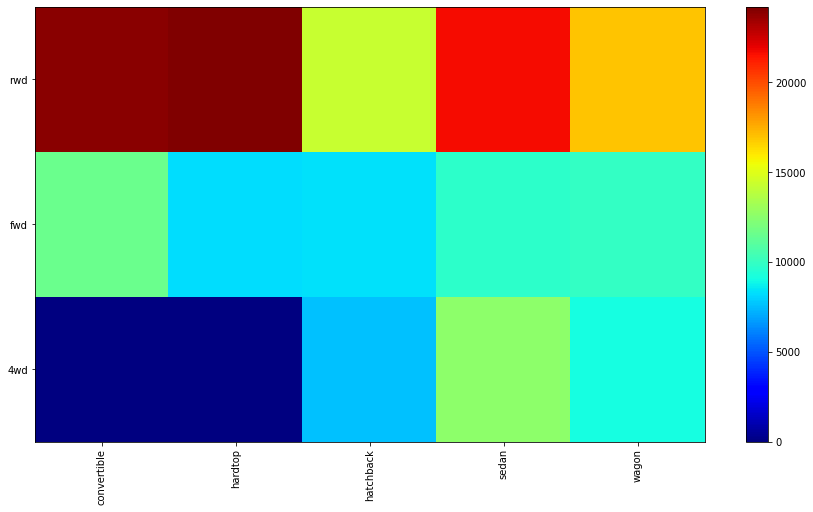

In [66]:
fig, ax = plt.subplots(figsize=(15,8))
im = ax.pcolor(grouped_pivot, cmap='jet')

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [67]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [68]:
grouped_pivot=df.pivot_table('price',index=['drive-wheels','engine-location'],columns=['body-style']).fillna(0)

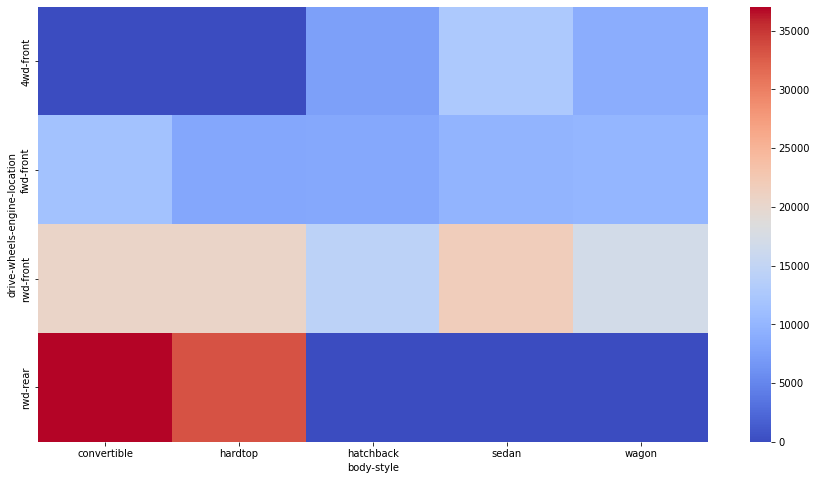

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(grouped_pivot,ax=ax,cmap='coolwarm')



# **Correlación**





La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

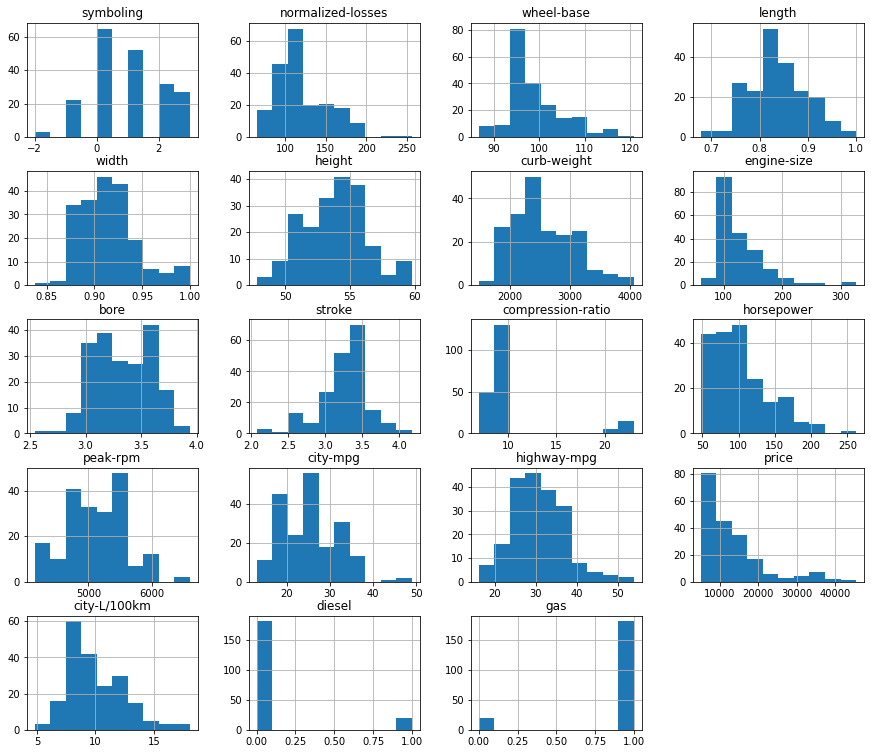

In [70]:
df.hist(figsize=(15,13))
plt.show()

En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las variables "price" y "engine-size"


<div align="center">
<img alt="CC BY-NC-SA logo" height="400px" src="https://docpid.s3.amazonaws.com/static/es_images/valor-de-p.png" align="center" hspace="0px" vspace="0px">
</div>





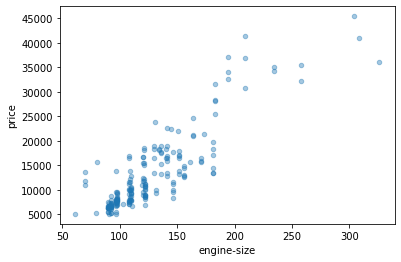

In [71]:
# test linearity
df.plot(kind="scatter", y = "price", x = "engine-size", alpha = 0.4)

In [72]:
from scipy.stats import skewtest, levene

#Temas de ciencias blandas --> Rechazar < 0.01
#Temas de algunas ciencias duras (fenomenolicas) <0.005
#Temas de ciencias duras (primeros principios) <0.001

# test the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.
print(skewtest(df["price"]))
print(skewtest(df["bore"]))

SkewtestResult(statistic=7.639137730516152, pvalue=2.186812829722033e-14)
SkewtestResult(statistic=-0.19444018694922788, pvalue=0.8458312256893494)


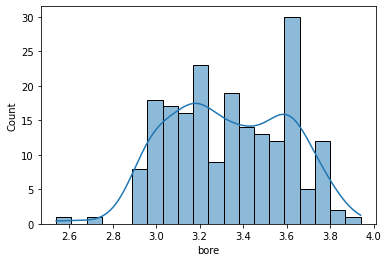

In [73]:
sns.histplot(data = df, x = "bore", kde = True, bins=20)

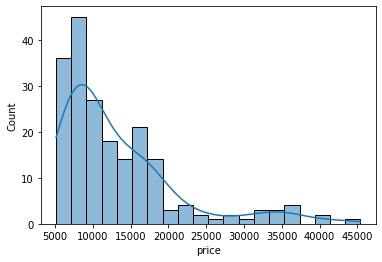

In [74]:
sns.histplot(data = df, x = "price", kde = True, bins=20)

<hr size=15 noshade color="#F19CBB">

**EJERCICIO 3**


Variar la variable a la que evaluar, por lo menos 3 opciones y compare con los histogramas.  

<hr size=15 noshade color="#F19CBB">

In [75]:
# test the null hypothesis that all input samples are from populations with equal variances
print(levene(df["price"],df["engine-size"]))

# A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.

LeveneResult(statistic=140.81734743196424, pvalue=4.916938115048979e-28)


In [76]:
levene?

Observamos que sí hay una relación lineal entre las variables. Sin embargo, los tests de uniformidad de la distribución y homogeneidad arrojan resultados negativos. Por lo tanto, la prueba de correlación apropiada para usar sería una prueba no paramétrica como la correlación de Spearman o de Kendall.

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [143]:
corr_p = df.corr()
corr_k = df.corr(method = "kendall")
corr_s = df.corr(method = "spearman")

corr_p

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Veamos cómo se correlaciona el atributo precio con los demás atributos

In [78]:
corr_p["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [79]:
corr_k["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.744265
horsepower           0.664788
engine-size          0.661342
city-L/100km         0.661282
width                0.638911
length               0.636420
wheel-base           0.540313
bore                 0.489625
height               0.182387
normalized-losses    0.134911
diesel               0.118449
stroke               0.094153
peak-rpm            -0.048705
symboling           -0.104866
gas                 -0.118449
compression-ratio   -0.136957
highway-mpg         -0.651805
city-mpg            -0.661282
Name: price, dtype: float64

In [80]:
corr_s["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.913767
horsepower           0.849142
city-L/100km         0.831284
engine-size          0.828417
width                0.812097
length               0.810331
wheel-base           0.681790
bore                 0.645943
height               0.263806
normalized-losses    0.202034
diesel               0.144657
stroke               0.117582
peak-rpm            -0.081912
symboling           -0.142683
gas                 -0.144657
compression-ratio   -0.177579
highway-mpg         -0.827265
city-mpg            -0.831284
Name: price, dtype: float64

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (kendall).

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían $29^2=841$ gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

In [144]:
from pandas.plotting import scatter_matrix

In [145]:
attributes = ["engine-size","curb-weight","horsepower","price"]

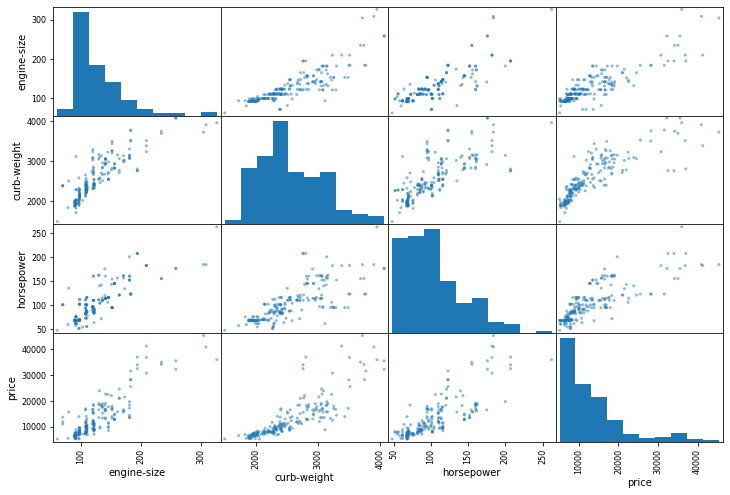

In [146]:
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

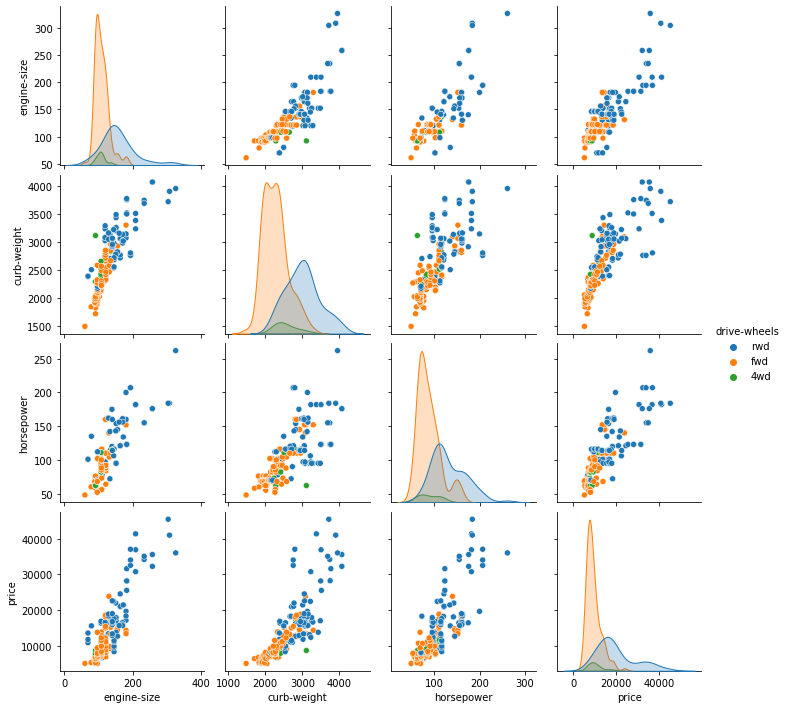

In [147]:
sns.pairplot(df, hue = "drive-wheels", vars = ["engine-size","curb-weight","horsepower","price"])

"ax.set_xticklabels(\n    ax.get_xticklabels(),\n    rotation=45,\n    horizontalalignment='right'\n);"

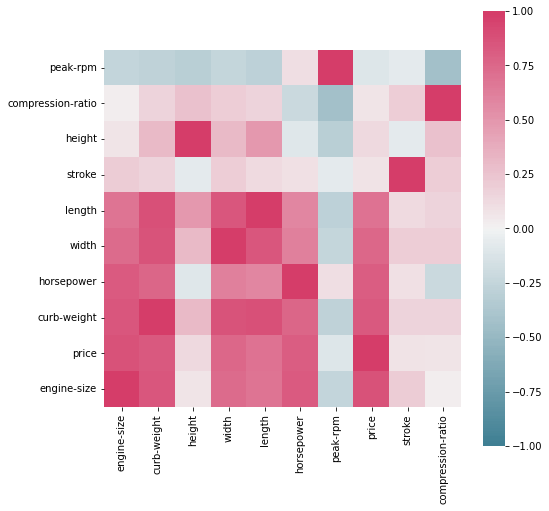

In [150]:
plt.figure(figsize=(8,8))
df_new = df[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr().sort_values(by='engine-size')

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 0, n=200),
    square=True
)

"""ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);"""

# **Análisis de varianza (ANOVA)**



El análisis de varianza es un método estadístico que se usa para probar si existe diferencias significativas entre las medias de dos o mas grupos. ANOVA arroja como resultados dos parámetros:

<ol>
    <li>F-test score: En ANOVA se asume que todos los valores medios de los diferentes grupos son el mismo, se calcula que tanto se desvia de este supuesto y se reporta por medio del puntaje F-test. Entre más grande sea este valor, mayor diferencia existirá entre los valores medios.</li>
    <li>P-Value: Este valor nos indica que tanta significancia estadística tienen nuestro puntaje.</li>
</ol>

El test de análisis de varianzas puede pensarse como una generalización del t-test a más de dos grupos. En ANOVA, la **hipotesis nula** establece que **las medias de las poblaciones de las cuales se tomaron las muestras de los grupos son iguales**. De forma más concisa tenemos que:

$\mu_1=\cdots=\mu_n$
 
Para un grupo de $n$ datos. La hipótesis alternativa sería que alguna de las medias de la ecuación anterior no se cumpla. Por lo tanto, tener un F-value alto y un p-value pequeño, implica que la probabilidad de que la hipótesis nula sea cierta es baja, por tanto, decimos que la hipotesis alternativa se debe cumplir.

Generalmente se asume que el ANOVA es un "análisis de dependencias" y se conoce como tal, ya que es una prueba para demostrar una supuesta relación de causa y efecto. En ese sentido si la variable precio(Y) que estamos analizando esta fuertemente correlacionada con una variable, esperamos que ANOVA nos devuelva un puntaje razonable del F-test y un valor pequeño del P-Value.

El el test one-way ANOVA es una técnica que es usada para variables blanco numéricas ("Y", siguendo la notación establecida), usualmente una variable, y datos de entrada de solo una variable numérica o categórica, por tal motivo se le conoce como "one-way".

## ANOVA para la reducción dimensional

También es posible aprovechar el análisis ANOVA para hacer reducción dimensional o limpieza de ruido, ya que éste nos entrega información sobre qué variables son más importantes para el modelado.



Veamos qué tal funciona éste método para limpar de ruido nuestros datos si los usamos para predecir el precio del auto.

In [86]:
#para ésta demostración usaremos solo las columnas con tipo flotante
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
d = [df.dtypes=='float64']
l = [d[0][i] for i in range(len(df.columns))]
df_float = df.loc[:,l]

In [87]:
df_float.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556


In [88]:
#generamos nuevas columnas con ruido aleatorio
rng = np.random.RandomState(42)
ruido = rng.normal(size=(df.shape[0], 10))
df_ruido =pd.DataFrame(ruido)

In [89]:
df2 = pd.concat([df_float,df_ruido],axis=1)

In [90]:
df2.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price,...,0,1,2,3,4,5,6,7,8,9
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,...,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,...,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,...,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,...,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [152]:
df2.corr()['price'].sort_values()

8                   -0.197906
6                   -0.115117
peak-rpm            -0.103535
3                   -0.082642
9                   -0.075617
0                   -0.049302
2                   -0.024422
4                   -0.002869
7                    0.001924
5                    0.034916
1                    0.066222
compression-ratio    0.067759
stroke               0.107893
height               0.182407
bore                 0.544375
wheel-base           0.591956
length               0.689466
width                0.744176
horsepower           0.802040
city-L/100km         0.803669
price                1.000000
Name: price, dtype: float64

In [153]:
y = df2['price'] #variable dependiente (a predecir)
X = df2.drop(['price'],axis=1) #variables independientes (features)

In [154]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [155]:
X.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,0,1,2,3,4,5,6,7,8,9
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,11.190476,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,11.190476,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,12.368421,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,9.791667,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,13.055556,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [ ]:
#y = m*x + b

In [94]:
from sklearn.feature_selection import f_regression #f_classif para problemas de clasificación
from sklearn.feature_selection import SelectPercentile
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html

In [156]:
select = SelectPercentile(score_func=f_regression, percentile=50)

In [157]:
select.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SelectPercentile(percentile=50,
                 score_func=<function f_regression at 0x7fb173008290>)

In [158]:
X_sel = select.transform(X)
print("X_initial",X.shape)
print("X_sel",X_sel.shape)

X_initial (196, 20)
X_sel (196, 10)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[('wheel-base', True), ('length', True), ('width', True), ('height', True), ('bore', True), ('stroke', True), ('compression-ratio', False), ('horsepower', True), ('peak-rpm', False), ('city-L/100km', True), (0, False), (1, False), (2, False), (3, False), (4, False), (5, False), (6, True), (7, False), (8, True), (9, False)]


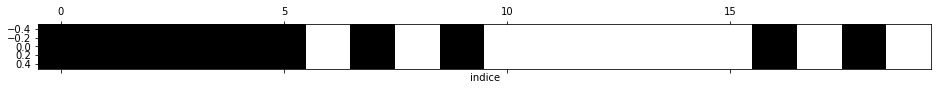

In [159]:
mask = select.get_support()
print([a for a in zip(X.columns,mask)])
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indice")
plt.show()

Al haber limpiado el ruido, éstos datos deberían ser mejor para generar un modelo que usar todas las columnas disponibles.

Hagámos un experimento: 

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [163]:
X_train.columns[select.get_support()]

Index([  'wheel-base',       'length',        'width',       'height',
               'bore',       'stroke',   'horsepower', 'city-L/100km',
                    6,              8],
      dtype='object')

In [164]:
select = SelectPercentile(score_func=f_regression,percentile=50)
select.fit(X_train, y_train)
X_sel = select.transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [165]:
X_test_sel = select.transform(X_test)
lr = LinearRegression()
lr_red = LinearRegression()
lr.fit(X_train, y_train)
lr_red.fit(X_sel, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [166]:
print("Precisión con todas las columnas: %.2f" %lr.score(X_test, y_test))
print("Precisión con las seleccionadas: %.2f" %lr_red.score(X_test_sel, y_test))

Precisión con todas las columnas: 0.81
Precisión con las seleccionadas: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Como vemos, en éste ejemplo sencillo de regresión lineal, la elimininación de ruido nos aumenta la precisión en un 2%

## ANOVA para creación de modelos


Podemos usar éste método para crear modelos con diferentes variables y ver su influencia en la predicción.

Crearémos un modelo para ver si algunas variables tienen relación con el precio (es decir qué tanto poder predictivo tienen).

Empecemos por la potencia del auto:

In [167]:
import statsmodels.api as sm
from statsmodels.formula.api import ols #Ordinary linear squares

In [169]:
anova_hp = ols('price ~ horsepower', data=df).fit() # price = Coef*horsepower + Interc

In [170]:
#y = mx + b
# price = c1*horsepower + c0 
anova_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           6.37e-48
Time:                        14:57:06   Log-Likelihood:                -1982.7
No. Observations:                 201   AIC:                             3969.
Df Residuals:                     199   BIC:                             3976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4597.5583    972.807     -4.726      0.000   -6515.891   -2679.226
horsepower   172.1831      8.850     19.455      0.000     154.731     189.636
==============================================================================
Omnibus:                       39.561   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.861
Skew:                           1.028   Prob(JB):                     3.03e-15
Kurtosis:                       4.939   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
sm.stats.anova_lm(anova_hp)

,df,sum_sq,mean_sq,F,PR(>F)
horsepower,1.0,7.781023e+09,7.781023e+09,349.82655,2.686405e-45
Residual,194.0,4.315048e+09,2.224252e+07,NaN,NaN


Podemos acceder a intervalos de confianza en nuestra predicción usando la función *wls_prediction_std*

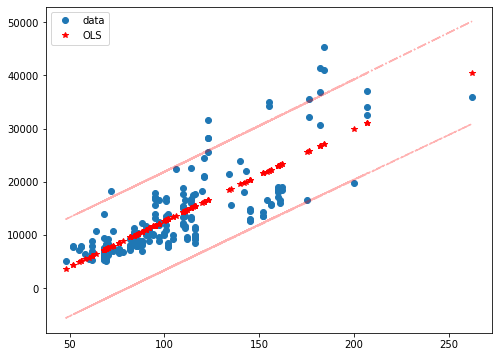

In [171]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

_, iv_l, iv_u = wls_prediction_std(anova_hp)

plt.figure(figsize=(8,6))
plt.plot(df.horsepower, df.price, 'o', label="data")
plt.plot(df.horsepower, anova_hp.fittedvalues, 'r*', label="OLS")
plt.plot(df.horsepower, iv_u, 'r-.',alpha=0.3)
plt.plot(df.horsepower, iv_l, 'r-.',alpha=0.3)
plt.legend(loc='upper left')
plt.show()

Podemos crear modelos también con la combinación de varias variables, e incluso usar variables categóricas anteponiendo una *C* al nombre, y el método se encargará de su conversión a numérica.

In [173]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [174]:
df['ensize']=df['engine-size']

In [175]:
anova_cat=ols('price ~ ensize+horsepower', data=df).fit() #y = m1x1 +m2x2 + b
sm.stats.anova_lm(anova_cat)

,df,sum_sq,mean_sq,F,PR(>F)
ensize,1.0,9.611926e+09,9.611926e+09,707.758358,2.701771e-67
horsepower,1.0,3.302475e+08,3.302475e+08,24.317228,1.725540e-06
Residual,198.0,2.688999e+09,1.358080e+07,NaN,NaN


In [176]:
anova_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     366.0
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           3.07e-67
Time:                        15:08:03   Log-Likelihood:                -1934.3
No. Observations:                 201   AIC:                             3875.
Df Residuals:                     198   BIC:                             3885.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8539.9570    845.275    -10.103      0.000   -1.02e+04   -6873.059
ensize       122.1035     11.032     11.068      0.000     100.347     143.860
horsepower    60.4913     12.267      4.931      0.000      36.301      84.682
==============================================================================
Omnibus:                        9.514   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               14.288
Skew:                           0.272   Prob(JB):                     0.000789
Kurtosis:                       4.188   Cond. No.                         560.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
anova_cat=ols('price ~ C(make)+horsepower', data=df).fit() # y = m1x1 + m2x2 + b
sm.stats.anova_lm(anova_cat)

,df,sum_sq,mean_sq,F,PR(>F)
C(make),21.0,1.005272e+10,4.787009e+08,81.461221,1.011969e-79
horsepower,1.0,1.532450e+09,1.532450e+09,260.779294,1.035023e-36
Residual,178.0,1.046004e+09,5.876427e+06,NaN,NaN


In [178]:
anova_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     89.61
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           3.40e-84
Time:                        15:10:12   Log-Likelihood:                -1839.4
No. Observations:                 201   AIC:                             3725.
Df Residuals:                     178   BIC:                             3801.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2377.3113   1618.329      1.469      0.144    -816.268    5570.891
C(make)[T.audi]           3494.9642   1715.560      2.037      0.043     109.511    6880.417
C(make)[T.bmw]            9202.7530   1643.493      5.600      0.000    5959.516    1.24e+04
C(make)[T.chevrolet]     -2930.8223   2020.560     -1.451      0.149   -6918.157    1056.512
C(make)[T.dodge]         -3540.0177   1635.747     -2.164      0.032   -6767.970    -312.066
C(make)[T.honda]         -2591.8984   1579.979     -1.640      0.103   -5709.800     526.003
C(make)[T.isuzu]         -2254.6878   2229.086     -1.011      0.313   -6653.523    2144.147
C(make)[T.jaguar]          1.08e+04   2045.025      5.279      0.000    6760.726    1.48e+04
C(make)[T.mazda]          -678.4180   1539.827     -0.441      0.660   -3717.083    2360.247
C(make)[T.mercedes-benz]  1.596e+04   1646.739      9.691      0.000    1.27e+04    1.92e+04
C(make)[T.mercury]       -4194.8873   2817.607     -1.489      0.138   -9755.098    1365.324
C(make)[T.mitsubishi]    -4033.2517   1558.792     -2.587      0.010   -7109.341    -957.162
C(make)[T.nissan]        -2698.0838   1518.908     -1.776      0.077   -5695.468     299.300
C(make)[T.peugot]         2661.9134   1587.574      1.677      0.095    -470.974    5794.801
C(make)[T.plymouth]      -3491.9151   1691.443     -2.064      0.040   -6829.776    -154.054
C(make)[T.porsche]        9027.5886   1899.774      4.752      0.000    5278.611    1.28e+04
C(make)[T.renault]       -3696.7848   2217.136     -1.667      0.097   -8072.039     678.469
C(make)[T.saab]           -414.5853   1714.144     -0.242      0.809   -3797.243    2968.073
C(make)[T.subaru]        -2865.4880   1585.152     -1.808      0.072   -5993.597     262.621
C(make)[T.toyota]        -2204.6756   1478.844     -1.491      0.138   -5122.999     713.648
C(make)[T.volkswagen]     -788.3448   1590.850     -0.496      0.621   -3927.697    2351.007
C(make)[T.volvo]          2285.6778   1579.028      1.448      0.150    -830.345    5401.701
horsepower                 104.6890      6.483     16.149      0.000      91.896     117.482
==============================================================================
Omnibus:                       53.941   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.057
Skew:                           1.094   Prob(JB):                     3.91e-36
Kurtosis:                       6.832   Cond. No.                     4.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong m

Statsmodels nos permite acceder a varias cantidades de interés para el modelo.

Puede acceder atodas las opciones en la [documentación](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html)


In [179]:
print('Parametros: ', anova_cat.params[:5])
print( anova_cat.params[-1])
print('Errores estándar: ', anova_cat.bse[:5])
print('Valores predichos: ', anova_cat.predict()[0:5])
print('R2: ', anova_cat.rsquared)

Parametros:  Intercept               2377.311304
C(make)[T.audi]         3494.964227
C(make)[T.bmw]          9202.753050
C(make)[T.chevrolet]   -2930.822319
C(make)[T.dodge]       -3540.017672
dtype: float64
104.6890055496793
Errores estándar:  Intercept               1618.328961
C(make)[T.audi]         1715.559851
C(make)[T.bmw]          1643.492908
C(make)[T.chevrolet]    2020.559978
C(make)[T.dodge]        1635.747010
dtype: float64
Valores predichos:  [13997.79092045 13997.79092045 18499.41815909 16550.5540973
 17911.51116944]
R2:  0.9171886929316507


In [117]:
print('Valores p:', anova_cat.pvalues)

Valores p: Intercept                   2.249117e-01
C(make)[T.audi]             4.043085e-02
C(make)[T.bmw]              8.539622e-08
C(make)[T.chevrolet]        1.770358e-01
C(make)[T.dodge]            3.764748e-02
C(make)[T.honda]            1.220009e-01
C(make)[T.isuzu]            3.404841e-01
C(make)[T.jaguar]           3.083004e-08
C(make)[T.mazda]            7.589694e-01
C(make)[T.mercedes-benz]    5.380278e-18
C(make)[T.mercury]          1.230204e-01
C(make)[T.mitsubishi]       1.154070e-02
C(make)[T.nissan]           8.456508e-02
C(make)[T.peugot]           8.478895e-02
C(make)[T.plymouth]         4.726974e-02
C(make)[T.porsche]          6.508630e-06
C(make)[T.renault]          1.021608e-01
C(make)[T.saab]             8.065587e-01
C(make)[T.subaru]           8.459492e-02
C(make)[T.toyota]           1.558361e-01
C(make)[T.volkswagen]       6.834126e-01
C(make)[T.volvo]            1.495441e-01
horsepower                  2.045085e-36
dtype: float64


Notemos que sm.stats no nos devuelve el valor F para todo el modelo, solo la contribución de cada variable, para ello usamos el método *summary*.

In [118]:
anova_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     86.40
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           2.46e-81
Time:                        13:16:42   Log-Likelihood:                -1792.6
No. Observations:                 196   AIC:                             3631.
Df Residuals:                     173   BIC:                             3707.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1980.1858   1625.871      1.218      0.225   -1228.912    5189.283
C(make)[T.audi]           3529.2902   1709.238      2.065      0.040     155.644    6902.936
C(make)[T.bmw]            9159.8455   1637.502      5.594      0.000    5927.792    1.24e+04
C(make)[T.chevrolet]     -2732.2596   2015.733     -1.355      0.177   -6710.856    1246.337
C(make)[T.dodge]         -3416.4440   1630.935     -2.095      0.038   -6635.537    -197.351
C(make)[T.honda]         -2448.9885   1575.879     -1.554      0.122   -5559.413     661.436
C(make)[T.isuzu]         -2123.7208   2221.825     -0.956      0.340   -6509.095    2261.653
C(make)[T.jaguar]         1.294e+04   2230.410      5.800      0.000    8534.564    1.73e+04
C(make)[T.mazda]          -485.1305   1578.584     -0.307      0.759   -3600.894    2630.633
C(make)[T.mercedes-benz]  1.589e+04   1640.952      9.685      0.000    1.27e+04    1.91e+04
C(make)[T.mercury]       -4352.2588   2808.297     -1.550      0.123   -9895.196    1190.678
C(make)[T.mitsubishi]    -3965.8996   1553.368     -2.553      0.012   -7031.893    -899.906
C(make)[T.nissan]        -2625.9111   1513.706     -1.735      0.085   -5613.622     361.799
C(make)[T.peugot]         2742.7596   1582.211      1.733      0.085    -380.164    5865.683
C(make)[T.plymouth]      -3369.5485   1686.355     -1.998      0.047   -6698.028     -41.069
C(make)[T.porsche]        8819.5202   1895.857      4.652      0.000    5077.532    1.26e+04
C(make)[T.renault]       -3630.0006   2209.124     -1.643      0.102   -7990.306     730.305
C(make)[T.saab]           -418.8101   1707.733     -0.245      0.807   -3789.484    2951.864
C(make)[T.subaru]        -2741.6504   1580.577     -1.735      0.085   -5861.348     378.048
C(make)[T.toyota]        -2101.5325   1474.320     -1.425      0.156   -5011.503     808.437
C(make)[T.volkswagen]     -648.1363   1586.629     -0.408      0.683   -3779.779    2483.506
C(make)[T.volvo]          2277.2283   1573.127      1.448      0.150    -827.765    5382.221
horsepower                 107.8576      6.672     16.166      0.000      94.689     121.027
==============================================================================
Omnibus:                       53.864   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.694
Skew:                           1.126   Prob(JB):                     3.47e-35
Kurtosis:                       6.790   Cond. No.                     4.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong m

**Ejercicio** Cree un modelo para el precio donde use: El tipo de motor(engine-type), las rpm pico (peak-rpm) y el sistema de gasolina (fuel-system), para predecir el precio del auto. 

Responda:


*   ¿Qué tan bueno es ese modelo?
*   ¿Todas las variable usadas son importantes?



In [180]:
nombres = {'engine-type':'enginetype','peak-rpm':'peakrpm','fuel-system':'fuelsystem'}
df.rename(columns=nombres, inplace=True)

anova_pro=ols('price ~ C(enginetype)+peakrpm+C(fuelsystem)', data=df).fit()
sm.stats.anova_lm(anova_pro, typ=2)

anova_pro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     11.01
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           2.61e-17
Time:                        15:16:21   Log-Likelihood:                -2032.7
No. Observations:                 201   AIC:                             4093.
Df Residuals:                     187   BIC:                             4140.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.69e+04   7663.244      2.205      0.029    1783.298     3.2e+04
C(enginetype)[T.l]     -3236.9528   2656.633     -1.218      0.225   -8477.775    2003.870
C(enginetype)[T.ohc]   -2460.0232   1967.897     -1.250      0.213   -6342.154    1422.108
C(enginetype)[T.ohcf]    -79.4207   2491.620     -0.032      0.975   -4994.717    4835.876
C(enginetype)[T.ohcv]   6553.0474   2514.001      2.607      0.010    1593.600    1.15e+04
C(enginetype)[T.rotor] -1725.9665   6482.117     -0.266      0.790   -1.45e+04    1.11e+04
C(fuelsystem)[T.2bbl]  -1271.6532   2201.654     -0.578      0.564   -5614.925    3071.619
C(fuelsystem)[T.4bbl]   4126.4706   7455.850      0.553      0.581   -1.06e+04    1.88e+04
C(fuelsystem)[T.idi]    6881.3026   2838.142      2.425      0.016    1282.411    1.25e+04
C(fuelsystem)[T.mfi]    4486.8071   6527.590      0.687      0.493   -8390.372    1.74e+04
C(fuelsystem)[T.mpfi]   7626.4706   2139.626      3.564      0.000    3405.564    1.18e+04
C(fuelsystem)[T.spdi]   2844.5627   2843.772      1.000      0.318   -2765.435    8454.560
C(fuelsystem)[T.spfi]   2570.8071   6527.590      0.394      0.694   -1.03e+04    1.54e+04
peakrpm                   -1.1927      1.209     -0.987      0.325      -3.577       1.192
==============================================================================
Omnibus:                       62.732   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.063
Skew:                           1.397   Prob(JB):                     1.57e-33
Kurtosis:                       6.199   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
sm.stats.anova_lm(anova_pro)

,df,sum_sq,mean_sq,F,PR(>F)
C(enginetype),4.0,2.152525e+09,5.381314e+08,14.100261,4.687087e-10
C(fuelsystem),6.0,2.884440e+09,4.807400e+08,12.596476,6.950682e-12
peakrpm,1.0,3.681203e+07,3.681203e+07,0.964559,3.273306e-01
Residual,184.0,7.022294e+09,3.816464e+07,NaN,NaN


De click **aquí** para ver la respuesta.

<!---

nombres = {'engine-type':'enginetype','peak-rpm':'peakrpm','fuel-system':'fuelsystem'}
df.rename(columns=nombres, inplace=True)

anova_pro=ols('price ~ C(enginetype)+peakrpm+C(fuelsystem)', data=df).fit()
sm.stats.anova_lm(anova_pro, typ=2)

anova_pro.summary()

--->

In [121]:
#df['peakrpm']=df['peak-rpm']
#df['fuelsystem']=df['fuel-system']

Predicción con Modelos OLS

In [122]:
modelo=ols('price ~ ensize + horsepower', data=df).fit()

In [123]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     399.2
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           2.62e-69
Time:                        13:16:42   Log-Likelihood:                -1875.7
No. Observations:                 196   AIC:                             3757.
Df Residuals:                     193   BIC:                             3767.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.006e+04    857.994    -11.730      0.000   -1.18e+04   -8371.903
ensize       144.7089     11.417     12.675      0.000     122.192     167.226
horsepower    46.6977     12.303      3.796      0.000      22.433      70.962
==============================================================================
Omnibus:                        8.499   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               14.345
Skew:                           0.171   Prob(JB):                     0.000767
Kurtosis:                       4.280   Cond. No.                         587.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
sm.stats.anova_lm(modelo)

,df,sum_sq,mean_sq,F,PR(>F)
ensize,1.0,9.565478e+09,9.565478e+09,783.988135,6.883448e-70
horsepower,1.0,1.757900e+08,1.757900e+08,14.407780,1.969866e-04
Residual,193.0,2.354803e+09,1.220105e+07,NaN,NaN


In [125]:
ensize=120
horsepower=100
print(modelo.predict({'ensize':ensize,'horsepower':horsepower}))
#-8539.9570+122.1035*ensize+60.4913*horsepower

0    11970.688711
dtype: float64


## ANOVA testing

Empecemos por cargar los datos de carros y volverlos a inspeccionar:

Realicemos una gráfica del precio medio en función de la de la marca, con el fin de analizar si existe alguna dependencia.

In [181]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [182]:
df_test2 = df[['make', 'price']].groupby(['make'])
print(df_test2.get_group('honda'))

     make    price
29  honda   6479.0
30  honda   6855.0
31  honda   5399.0
32  honda   6529.0
33  honda   7129.0
34  honda   7295.0
35  honda   7295.0
36  honda   7895.0
37  honda   9095.0
38  honda   8845.0
39  honda  10295.0
40  honda  12945.0
41  honda  10345.0


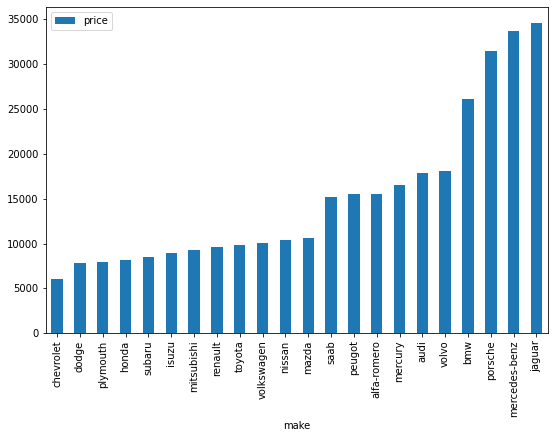

In [183]:
dftest1 = df[["make","price"]].groupby("make").mean().sort_values(by="price")
dftest1.plot(kind="bar",figsize=(9,6))

De este gráfica se puede observar que existe una  variación del precio medio a medida que nos movemos de izquierda a derecha en las diferentes marcas, no obstente, no sabemos cual marca de carro tienen el impacto más alto y cual menos en la predicción del precio. 

Mediante ANOVA podemos ver si existe una diferencia significativa entre las medias de los precios de dos o más marcas.

Recuerdemos que ANOVA retorna dos valores:

* F-value: Que representa la razón de la variación entre la media de los grupos y la variación dentro de cada grupo.

* p-value: Que representa la probabilidad de que la hipótesis nula (medias iguales) sea cierta. El valor p respresenta entonces, la significancia estadística.

Veamos en una grafica de boxplots como se relacionan las diferentes marcas segun el precio.

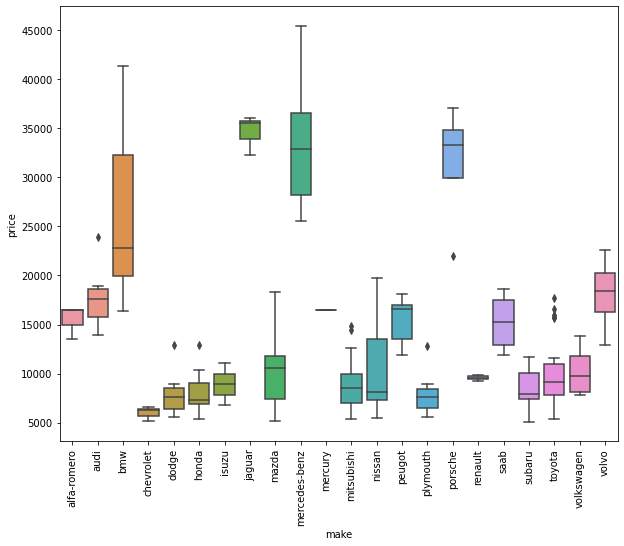

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="make", y="price", data=df[["make","price"]],ax=ax)
plt.xticks(rotation=90)
plt.show()

De esta gráfica resulta dificil establecer si existe una correlación entre la variable categórica "marca" y el precio.

Con el fin de comprender más a fondo la finalidad de ANOVA y lo que mide, intentemos diferenciar entre precios de carro según las marcas.

Iniciemos la comparación entre dos grupos de marcas, aunque la finalidad de ANOVA consiste en diferenciar más de dos grupos (para diferenciar solo dos grupos, la prueba más adecuada es la t-student).

De la base de datos de carros, extraigamos solo la marca y el precio y almacenémoslo en un nuevo dataFrame:

In [185]:
df_test = df[["make","price"]]
df_test.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


Creemos una función que nos sirva para escoger dos marcas dadas dentro de la columna de make y que la guarde con el respectivo precio en una nueva variable. Sea esta función escoger2marcas:

In [186]:
def escoger2marcas(df,marca1,marca2):
  locations = [bool(df.loc[i][0]==marca1)|bool(df.loc[i][0]==marca2) for i in range(len(df))]
  marca1_marca2 = df.loc[:][locations]
  
  return marca1_marca2

Establezcamos dos pares de marcas cuyo valor medio difieran notablemente y cuyo valor medio sean aproximados con el fin de ver los resultados de un test ANOVA:

* Medias diferentes honda vs volvo.
* Medias similares volkswagen vs nissan.

In [187]:
# Grupos de medias diferentes
honda_volvo = escoger2marcas(df_test,"honda","volvo")
honda_volvo

,make,price
29,honda,6479.0
30,honda,6855.0
31,honda,5399.0
32,honda,6529.0
33,honda,7129.0
34,honda,7295.0
35,honda,7295.0
36,honda,7895.0
37,honda,9095.0
38,honda,8845.0


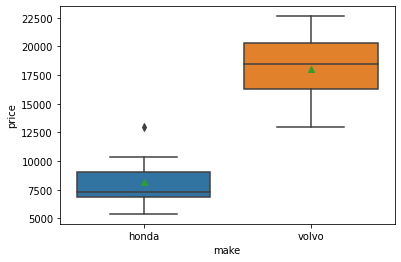

In [188]:
sns.boxplot(x="make", y="price", data=honda_volvo,showmeans=True)

Si comparamos dos grupos muy diferentes obtenemos un F-value elevado y un p-value pequeño.

Apliquemos ANOVA con scipy.stats:

NOTA: la función que verán a continuación de `get_group()` obtienen el subgrupo que se le pase al argumento dentro de una lista, es decir, `test2.get_group('reanault')` devuelve una lista del dataframe solo con la subcategoria `renault`.

Agrupemos primero por fabricante el data frame:


In [134]:
df_test2 = df[['make', 'price']].groupby(['make'])
print(df_test2.get_group('honda'))
print(df_test2.get_group('volvo'))

     make    price
29  honda   6479.0
30  honda   6855.0
31  honda   5399.0
32  honda   6529.0
33  honda   7129.0
34  honda   7295.0
35  honda   7295.0
36  honda   7895.0
37  honda   9095.0
38  honda   8845.0
39  honda  10295.0
40  honda  12945.0
41  honda  10345.0
      make    price
190  volvo  12940.0
191  volvo  13415.0
192  volvo  15985.0
193  volvo  16515.0
194  volvo  18420.0
195  volvo  18950.0
196  volvo  16845.0
197  volvo  19045.0
198  volvo  21485.0
199  volvo  22470.0
200  volvo  22625.0


Realicemos el test ANOVA mediante la librería de scipy y el módulo de stats:

In [189]:
from scipy import stats

f_val, p_val = stats.f_oneway(df_test2.get_group('honda')['price'], df_test2.get_group('volvo')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 79.51335772254384 , P = 9.307852725853743e-09


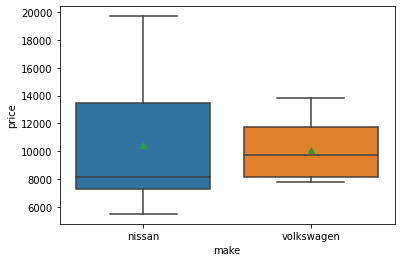

In [190]:
# Grupos de medias similares
honda_volvo = escoger2marcas(df_test,"volkswagen","nissan")
sns.boxplot(x="make", y="price", data=honda_volvo,showmeans=True)

In [191]:
f_val, p_val = stats.f_oneway(df_test2.get_group('volkswagen')['price'], df_test2.get_group('nissan')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.058661339194129865 , P = 0.8103896431706177


Vemos que con ANOVA tenemos una "forma cuantitativa" de corroborar la inspección visual que se realiza con los boxplots.

Los resultados del test ANOVA para la comparación de este par de los grupos de marcas de carros es el siguiente:

honda vs volvo: El test ANOVA arroja un F-value alto y un p-value pequeño, lo que implica que deberíamos rechazar la hipótesis nula de que las medias de los grupos son aproximadamente iguales. En este sentido ambos grupos son diferentes y guardarian correlación con el precio.
volkswagen vs nissan: El test ANOVA arroja un F-value bajo y un p-value alto, lo que indica que debemos aceptar la hipótesis nula de que las medias son aproximadamente iguales y no guardarían correlación con el precio.

**Recapitulando**:

El test de análisis de varianzas (ANOVA - Analysis Of Variance) es un método estadístico usado para provar las diferencias entre dos o más grupos.

ANOVA se usa para el análisis de diferencias generales, en lugar de específicas, entre medias.

Mediante un test ANOVA, podemos averiguar si los resultados de un experimento o encuesta son significativos. En otras palabras, el test ANOVA nos permite rechazar o aceptar la hipótesis nula. Básicamente, lo que se hace es probar si existe una diferencia entre grupos. Algunos ejemplos en los que se puede aplicar este método son:

Un grupo de pacientes psiquiátricos está probando tres terapias diferentes: asesoramiento, medicación y biorretroalimentación, en el que se desea ver si una terapia es mejor que las otras.

Un fabricante que tiene dos procesos diferentes para hacer bombillas y quieren saber si un proceso es mejor que el otro.

Los estudiantes de diferentes universidades realizan el mismo examen y se desea ver si una universidad supera a la otra.

## One-way ANOVA: Incluyendo varios grupos.
Apliquemos ahora un test ANOVA sobre todos los grupos conformados por las diferentes marcas para ver su relación con el precio.

Tengamos que ANOVA lo podemos aplicar de dos formas:

1.   Mediante el módulo `stats` de `scipy`
2.   Mediante el módulo `statmodels`, ajustando un modelo a los datos.

Ambos métodos son similares pero cuentan con implementaciones de fondo, ligeramente diferentes , por lo que los resultados obtenidos de los valores F-value y p-value son, también, ligeramente diferentes.



**ANOVA - mediante el módulo stats de scipy**:

Procedamos a ver todas las marcas de carros de nuestro dataset:

In [138]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [139]:
from scipy import stats
f_val, p_val = stats.f_oneway(df_test2.get_group('alfa-romero')['price'],df_test2.get_group('audi')['price'],df_test2.get_group('bmw')['price'],df_test2.get_group('chevrolet')['price'],df_test2.get_group('dodge')['price'],df_test2.get_group('honda')['price'],df_test2.get_group('jaguar')['price'],df_test2.get_group('mazda')['price'],df_test2.get_group('mercedes-benz')['price'],df_test2.get_group('mercury')['price'],df_test2.get_group('mitsubishi')['price'],df_test2.get_group('nissan')['price'],df_test2.get_group('peugot')['price'],df_test2.get_group('plymouth')['price'],df_test2.get_group('porsche')['price'],df_test2.get_group('renault')['price'],df_test2.get_group('saab')['price'],df_test2.get_group('subaru')['price'],df_test2.get_group('toyota')['price'],df_test2.get_group('volkswagen')['price'],df_test2.get_group('volvo')['price'])  
   
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 34.6926644878663 , P = 8.007511322526291e-51


**ANOVA - mediante statsmodels:**

In [140]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('price ~ C(make)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     33.23
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           1.07e-50
Time:                        13:16:44   Log-Likelihood:                -1930.1
No. Observations:                 201   AIC:                             3904.
Df Residuals:                     179   BIC:                             3977.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  1.55e+04   2191.253      7.073      0.000    1.12e+04    1.98e+04
C(make)[T.audi]           2360.8333   2683.726      0.880      0.380   -2934.978    7656.645
C(make)[T.bmw]            1.062e+04   2569.472      4.133      0.000    5550.063    1.57e+04
C(make)[T.chevrolet]     -9491.3333   3098.900     -3.063      0.003   -1.56e+04   -3376.257
C(make)[T.dodge]         -7622.8889   2530.241     -3.013      0.003   -1.26e+04   -2629.950
C(make)[T.honda]         -7313.6410   2430.977     -3.009      0.003   -1.21e+04   -2516.580
C(make)[T.isuzu]         -6581.8333   3464.676     -1.900      0.059   -1.34e+04     255.030
C(make)[T.jaguar]          1.91e+04   3098.900      6.164      0.000     1.3e+04    2.52e+04
C(make)[T.mazda]         -4845.4510   2376.748     -2.039      0.043   -9535.500    -155.402
C(make)[T.mercedes-benz]  1.815e+04   2569.472      7.063      0.000    1.31e+04    2.32e+04
C(make)[T.mercury]        1004.6667   4382.507      0.229      0.819   -7643.357    9652.691
C(make)[T.mitsubishi]    -6258.5641   2430.977     -2.575      0.011   -1.11e+04   -1461.504
C(make)[T.nissan]        -5082.6667   2366.824     -2.147      0.033   -9753.133    -412.200
C(make)[T.peugot]           -9.2424   2472.067     -0.004      0.997   -4887.386    4868.901
C(make)[T.plymouth]      -7534.9048   2619.049     -2.877      0.005   -1.27e+04   -2366.722
C(make)[T.porsche]         1.59e+04   2898.756      5.486      0.000    1.02e+04    2.16e+04
C(make)[T.renault]       -5903.3333   3464.676     -1.704      0.090   -1.27e+04     933.530
C(make)[T.saab]           -275.0000   2683.726     -0.102      0.918   -5570.811    5020.811
C(make)[T.subaru]        -6957.0833   2449.896     -2.840      0.005   -1.18e+04   -2122.691
C(make)[T.toyota]        -5612.5208   2291.668     -2.449      0.015   -1.01e+04   -1090.361
C(make)[T.volkswagen]    -5420.8333   2449.896     -2.213      0.028   -1.03e+04    -586.441
C(make)[T.volvo]          2564.8485   2472.067      1.038      0.301   -2313.295    7442.992
==============================================================================
Omnibus:                       30.411   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.610
Skew:                           0.777   Prob(JB):                     1.39e-12
Kurtosis:                       5.027   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(make),1.005272e+10,21.0,33.232103,1.068343e-50
Residual,2.578454e+09,179.0,NaN,NaN


De los resultados del test ANOVA para todas las las marcas, podemos concluir que puede ser un buen predictor del precio, no obstante, no podemos concluir cuales marcas no aportan diferencias en relación al precio.

Para hallar los grupos que contribuyen más a diferenciar los precios y cuales menos, debemos hacer un test post-hoc.

**Test Post-hoc:**

No entraremos en detalle sobre la parte teórica de un test post-hoc, sino que nos centraremos los resultados que arroja la prueba.

Hay algunas técnicas diferentes que se pueden utilizar para establecer que grupos contribuyen o no a diferenciar el precio. Cada una de estas técnicas tiene diferentes formas de controlar el [tasa de error por familia](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/multiple-comparisons/what-are-individual-and-family-error-rates/). Los métodos principales que pueden encontrarse en python son:

* Fisher’s Least Significant Difference (LSD).
* Bonferroni correction.
* Tukey’s HSD.

Usemos el último de estos para hacer un test post-hoc.

In [142]:
#Implementemos el método de Turkey's:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['price'], df['make'])
mc_results = mc.tukeyhsd()
print(mc_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1        group2      meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------
  alfa-romero          audi   2360.8333    0.9  -7432.6038  12154.2704  False
  alfa-romero           bmw  10620.4167 0.0097   1243.9145  19996.9188   True
  alfa-romero     chevrolet  -9491.3333 0.2401 -20799.8204   1817.1538  False
  alfa-romero         dodge  -7622.8889 0.2683 -16856.2299   1610.4522  False
  alfa-romero         honda   -7313.641 0.2707 -16184.7482   1557.4661  False
  alfa-romero         isuzu  -6581.8333    0.9 -19225.1063   6061.4396  False
  alfa-romero        jaguar  19101.6667  0.001   7793.1796  30410.1538   True
  alfa-romero         mazda   -4845.451    0.9 -13518.6647   3827.7627  False
  alfa-romero mercedes-benz  18148.6667  0.001   8772.1645  27525.1688   True
  alfa-romero       mercury   1004.6667    0.9 -14987.9491  1699

El test post-hoc Turkey HDS contrala el error tipo I y mantienen el la tasa de error familiar en 0.05 (en la tabla se indica como FWER=0.05). Sobre la tabla anterior se tiene que: 
* Las columnas "grupo1" y grupo2 corresponden a los grupos que son comparados. 
* `meandiff` representa la diferencia en valores medios de los grupos calculados (group1-group2).
* Las columnas `lower` y `upper` corresponden a los límites inferior y superior del intervalo de confianza del 95%.
* En la columna `reject` se establece si debemos rechazar o no la hipotesis nula (medias iguales). 